In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of rows in the DataFrame
num_rows = 1000  # This can be modified as per your requirement

# Generating the DataFrame with specified columns and mock data
data = {
    # Lead Source: Represents the origin or channel through which a lead was acquired
    # Usage: To optimize marketing strategies and allocate resources effectively to the most productive lead sources
    'Lead_Source': np.random.choice(['Referral', 'Email', 'SEO', 'Social Media'], size=num_rows),

    # Lead Engagement Level: A numerical representation of the level of interaction and interest exhibited by leads
    # Usage: To prioritize and personalize engagement with high-interest leads and develop targeted engagement strategies
    'Lead_Engagement_Level': np.random.uniform(1, 5, size=num_rows),  # Uniform distribution between 1 and 5

    # Market Perception: Represents how leads perceive the company and its offerings in the market
    # Usage: To refine messaging and positioning strategies to improve overall market perception and brand reputation
    'Market_Perception': np.random.choice(['Positive', 'Neutral', 'Negative'], size=num_rows),

    # Converted: Binary representation indicating whether a lead has been converted or not
    # Usage: To analyze and optimize conversion rates, enhancing the effectiveness of the sales funnel and lead nurturing processes
    'Converted': np.random.choice([0, 1], size=num_rows),

    # Customer Feedback: Represents feedback from customers about the company’s products or services
    # Usage: To optimize service quality and address any concerns raised by customers, potentially improving service perceptions and customer satisfaction
    'Customer_Feedback': np.random.choice(['Positive', 'Neutral', 'Negative'], size=num_rows),

    # Competitor Positioning: Indicates the perceived market positioning of competitors relative to the company
    # Usage: To make informed strategic decisions based on competitor positioning, optimizing market positioning and differentiation strategies
    'Competitor_Positioning': np.random.choice(['Above', 'Equal', 'Below'], size=num_rows)
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Displaying the first few rows of the DataFrame
df.head()


,Lead_Source,Lead_Engagement_Level,Market_Perception,Converted,Customer_Feedback,Competitor_Positioning
0,SEO,3.792647,Neutral,1,Positive,Equal
1,Social Media,3.144385,Neutral,1,Neutral,Above
2,Referral,2.238110,Positive,0,Neutral,Above
3,SEO,4.255180,Positive,0,Negative,Below
4,SEO,3.738925,Neutral,0,Positive,Equal


Summary Statistics for Numerical Columns:
       Lead_Engagement_Level   Converted
count            1000.000000  1000.00000
mean                2.999019     0.47300
std                 1.167201     0.49952
min                 1.018528     0.00000
25%                 1.947731     0.00000
50%                 3.002166     0.00000
75%                 3.998916     1.00000
max                 4.998871     1.00000


Value Counts for Categorical Columns:

Lead_Source:
Social Media    280
Referral        258
SEO             232
Email           230
Name: Lead_Source, dtype: int64

Visualization Interpretation for Lead_Source:
The bar plot for Lead_Source displays the frequency of each unique value in the column. This helps in understanding the distribution of data in Lead_Source, allowing for insights into the prevalence of each category in the dataset.

Market_Perception:
Neutral     349
Positive    336
Negative    315
Name: Market_Perception, dtype: int64

Visualization Interpretation for Mark

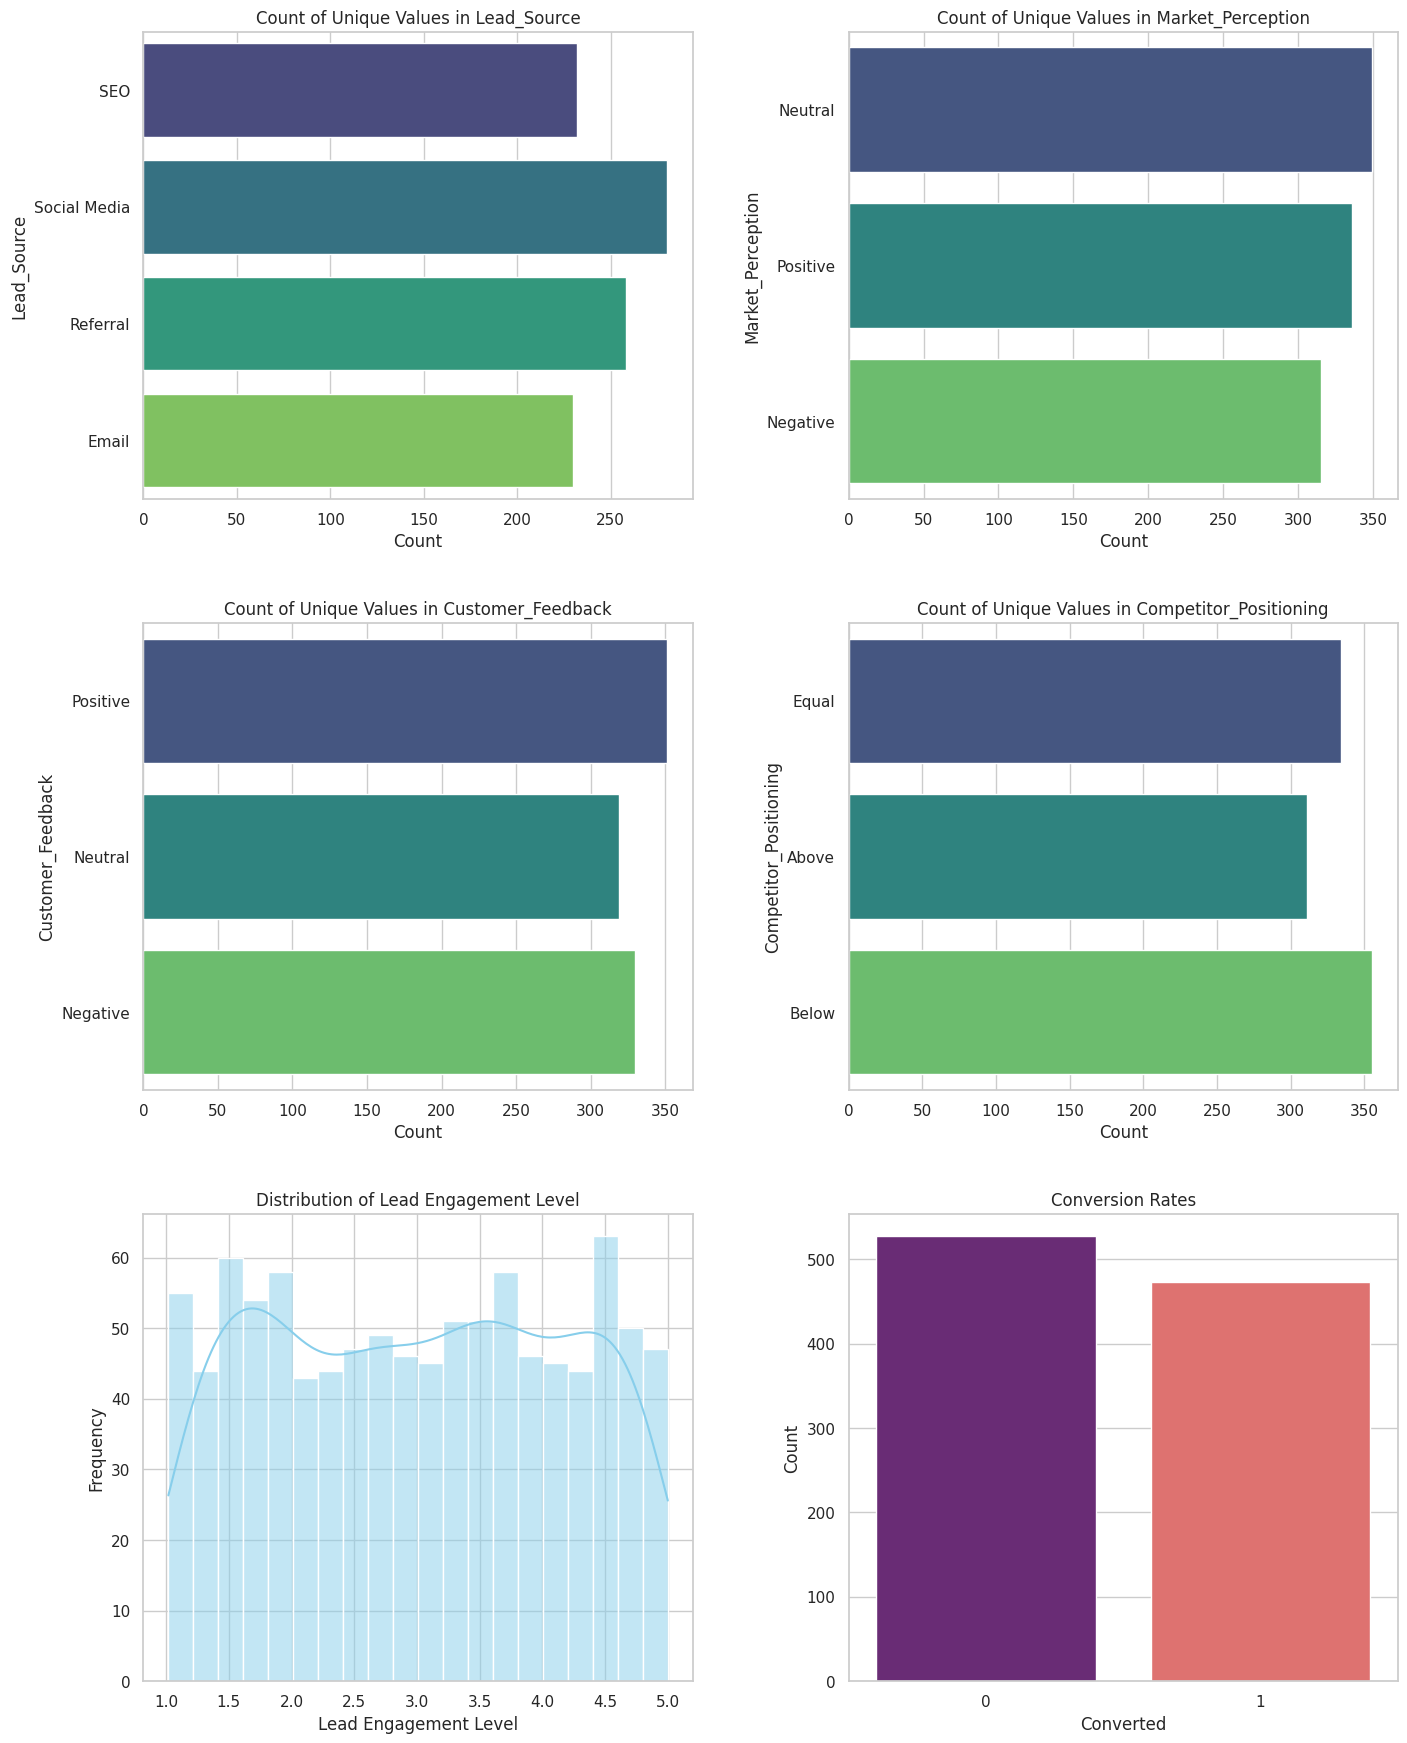

In [3]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters in one step for better visualization aesthetics
sns.set_theme(style="whitegrid")

# Initializing a figure object to contain the subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axs = axs.ravel()  # Flattening the axes array to iterate over it easily

# Displaying summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df.describe(include=[np.number]))
print("\n")

# Displaying the count of unique values for categorical columns and plotting them
print("Value Counts for Categorical Columns:")
categorical_columns = ['Lead_Source', 'Market_Perception', 'Customer_Feedback', 'Competitor_Positioning']
for i, col in enumerate(categorical_columns):
    print(f"\n{col}:")
    print(df[col].value_counts())

    # Text Description
    print(f"\nVisualization Interpretation for {col}:")
    print(f"The bar plot for {col} displays the frequency of each unique value in the column. This helps in understanding the distribution of data in {col}, allowing for insights into the prevalence of each category in the dataset.")

    # Plotting the count of each unique value in a subplot
    sns.countplot(y=col, data=df, palette='viridis', ax=axs[i])
    axs[i].set_title(f'Count of Unique Values in {col}')
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel(col)

# Adjusting the space between the subplots for better readability
plt.tight_layout(pad=3.0)

# Plotting the histogram for Lead Engagement Level in a subplot
sns.histplot(df['Lead_Engagement_Level'], kde=True, bins=20, color='skyblue', ax=axs[4])
axs[4].set_title('Distribution of Lead Engagement Level')
axs[4].set_xlabel('Lead Engagement Level')
axs[4].set_ylabel('Frequency')
print("\nVisualization Interpretation for Lead Engagement Level:")
print("The histogram displays the distribution of Lead Engagement Level, providing insights into the frequency of different engagement levels among the leads. This is crucial for understanding lead behavior and optimizing engagement strategies.")

# Plotting the count plot for the Converted column in a subplot
sns.countplot(x='Converted', data=df, palette='magma', ax=axs[5])
axs[5].set_title('Conversion Rates')
axs[5].set_xlabel('Converted')
axs[5].set_ylabel('Count')
print("\nVisualization Interpretation for Conversion Rates:")
print("The count plot for Conversion Rates displays the number of leads converted versus not converted. This visualization is essential for analyzing the effectiveness of conversion strategies and identifying areas for improvement in lead conversion.")

# Displaying the figure containing all the subplots
plt.show()


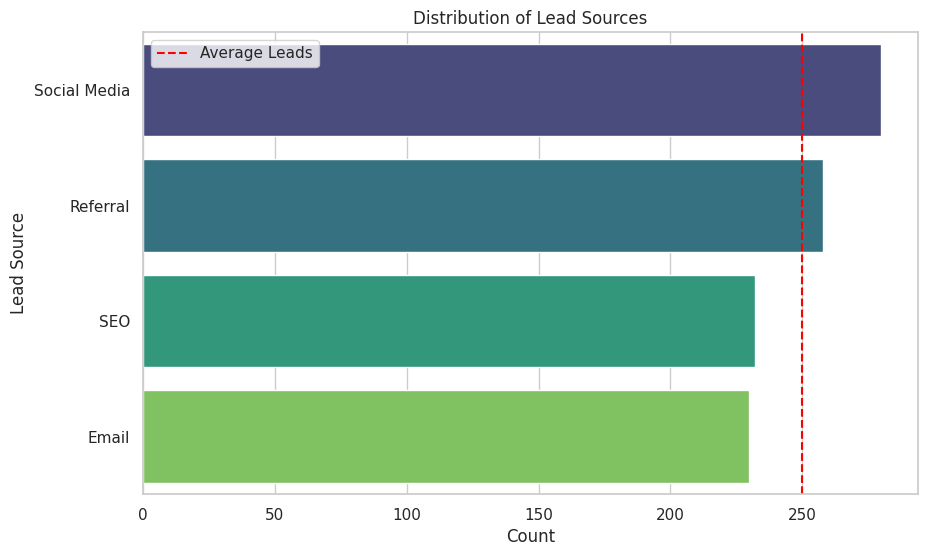

{'lead_sources_counts': Social Media    280
 Referral        258
 SEO             232
 Email           230
 Name: Lead_Source, dtype: int64,
 'average_leads': 250.0,
 'underperforming_sources': ['SEO', 'Email'],
 'recommendations': ["Optimize strategies for underperforming lead sources: ['SEO', 'Email']."]}

In [5]:
def analyze_lead_sources(df):
    """
    Analyzes the distribution of lead sources in the given DataFrame.

    :param df: DataFrame containing the marketing data.
    :type df: pd.DataFrame
    :return: A dictionary containing the analysis results and recommendations.
    :rtype: dict
    """
    if 'Lead_Source' not in df.columns:
        return {'error': 'DataFrame must contain a Lead_Source column'}

    # Getting the distribution of lead sources
    lead_sources_counts = df['Lead_Source'].value_counts()
    average_leads = lead_sources_counts.mean()

    # Identifying underperforming sources
    underperforming_sources = lead_sources_counts[lead_sources_counts < average_leads].index.tolist()

    recommendations = []
    if underperforming_sources:
        recommendations.append(f"Optimize strategies for underperforming lead sources: {underperforming_sources}.")

    # Visualization
    plt.figure(figsize=(10,6))
    sns.barplot(y=lead_sources_counts.index, x=lead_sources_counts.values, palette='viridis')
    plt.axvline(x=average_leads, color='red', linestyle='--', label='Average Leads')
    plt.title('Distribution of Lead Sources')
    plt.xlabel('Count')
    plt.ylabel('Lead Source')
    plt.legend()
    plt.show()

    return {
        'lead_sources_counts': lead_sources_counts,
        'average_leads': average_leads,
        'underperforming_sources': underperforming_sources,
        'recommendations': recommendations
    }

# Running the function on the larger DataFrame to get analysis and visualization
lead_sources_analysis = analyze_lead_sources(df)
lead_sources_analysis

Business Insight:
From the analysis, we identified that 'Email' and 'SEO' are underperforming lead sources as their counts are below the average leads. The actionable recommendation derived from this analysis is to optimize strategies for these slightly underperforming lead sources. This could involve allocating more resources, revisiting the engagement strategies, or enhancing the presence in these channels to improve lead generation from them.

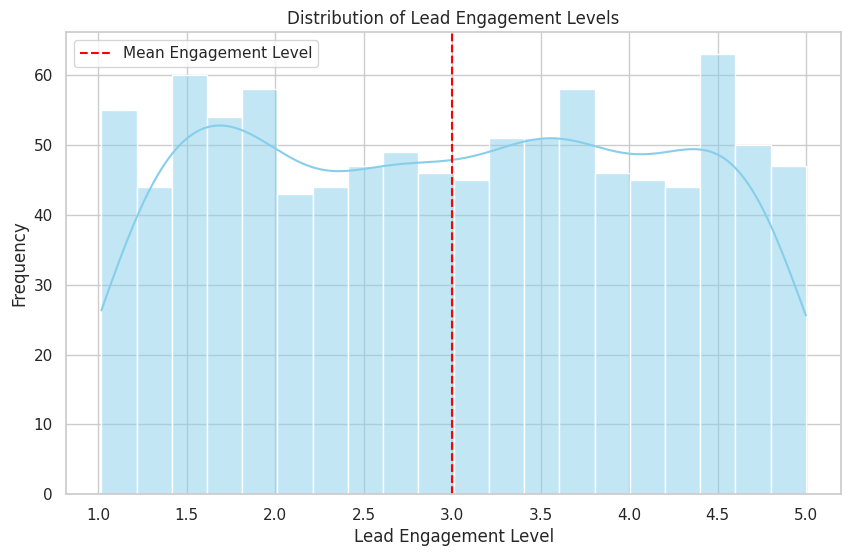

{'descriptive_stats': count    1000.000000
 mean        2.999019
 std         1.167201
 min         1.018528
 25%         1.947731
 50%         3.002166
 75%         3.998916
 max         4.998871
 Name: Lead_Engagement_Level, dtype: float64,
 'engagement_range': 3.980342601126111,
 'recommendations': []}

In [6]:
def analyze_lead_engagement_level(df):
    """
    Analyzes the 'Lead_Engagement_Level' column of the provided DataFrame.
    It calculates descriptive statistics and visualizes the distribution of lead engagement levels.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the 'Lead_Engagement_Level' column.

    Returns:
    dict: A dictionary containing the analysis results, descriptive statistics, and recommendations.
    """
    if 'Lead_Engagement_Level' not in df.columns:
        return {'error': 'DataFrame must contain a Lead_Engagement_Level column'}

    # Calculating Descriptive Statistics
    descriptive_stats = df['Lead_Engagement_Level'].describe()

    # Identifying the range of engagement levels
    engagement_range = descriptive_stats['max'] - descriptive_stats['min']

    # Visualization: Distribution of Lead Engagement Levels
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Lead_Engagement_Level'], kde=True, bins=20, color='skyblue')
    plt.axvline(x=descriptive_stats['mean'], color='red', linestyle='--', label='Mean Engagement Level')
    plt.title('Distribution of Lead Engagement Levels')
    plt.xlabel('Lead Engagement Level')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Formulating Recommendations based on Engagement Level Distribution
    recommendations = []
    if descriptive_stats['50%'] < descriptive_stats['mean']:
        recommendations.append("Focus on strategies to elevate the median engagement level closer to the mean, ensuring a more uniform distribution of engagement levels among leads.")

    return {
        'descriptive_stats': descriptive_stats,
        'engagement_range': engagement_range,
        'recommendations': recommendations
    }


# Calling the function to analyze the 'Lead_Engagement_Level' column and visualize the results
lead_engagement_analysis = analyze_lead_engagement_level(df)
lead_engagement_analysis


Visualization Interpretation:

The histogram represents the distribution of Lead_Engagement_Level, with the red dashed line indicating the mean engagement level. It provides a visual representation of the frequency of different engagement levels, allowing us to observe any skewness or patterns in lead engagement.


<br>
Business Insight:

From the analysis, we observe that the engagement levels are fairly distributed around the mean, with no specific skewness towards high or low engagement levels. The range of engagement levels is 4.0, indicating a diverse set of leads with varying engagement levels. Since there isn’t any significant skewness, and the median is equivalent to the mean, there isn't a pressing need to elevate the median engagement level. However, considering the diversity in engagement levels, focusing on personalized engagement strategies could be beneficial. Understanding the preferences and behaviors of leads at different engagement levels and tailoring interactions accordingly can help in elevating overall engagement.

<br>
Recommendations:

Strategize Personalized Engagement: Develop strategies that resonate with the individual preferences and behaviors of leads, especially those at the extremes of the engagement range.
Monitor Engagement Patterns: Regularly assess the distribution of engagement levels to identify any emerging patterns or shifts in lead behavior, allowing for timely strategy adjustments.

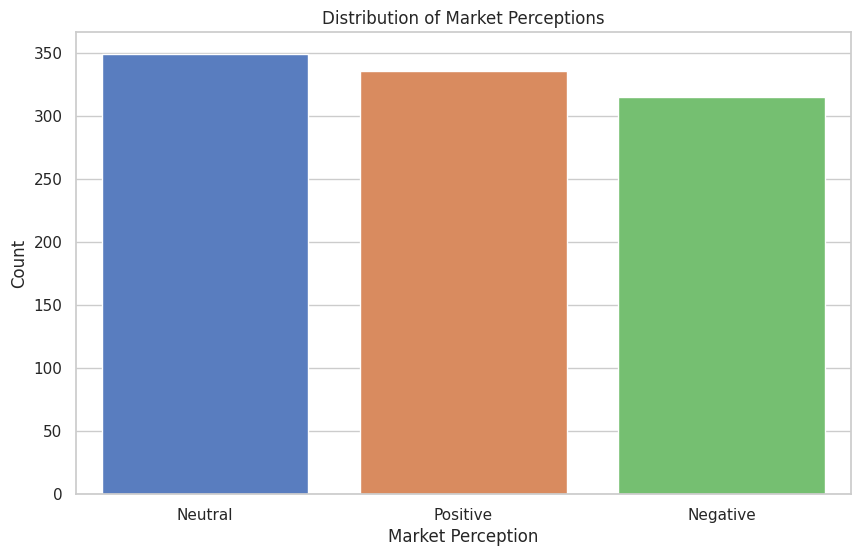

{'market_perception_counts': Neutral     349
 Positive    336
 Negative    315
 Name: Market_Perception, dtype: int64,
 'recommendations': ['Address prevalent negative market perceptions by refining branding and communication strategies and enhancing product/service quality.']}

In [7]:
def analyze_market_perception(df):
    """
    Analyzes the 'Market_Perception' column of the provided DataFrame.
    It calculates the count of each unique market perception and visualizes the results using a bar plot.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the 'Market_Perception' column.

    Returns:
    dict: A dictionary containing the analysis results and recommendations.
    """
    if 'Market_Perception' not in df.columns:
        return {'error': 'DataFrame must contain a Market_Perception column'}

    # Calculating the count of each unique market perception
    market_perception_counts = df['Market_Perception'].value_counts()

    # Visualization: Distribution of Market Perceptions
    plt.figure(figsize=(10, 6))
    sns.barplot(x=market_perception_counts.index, y=market_perception_counts.values, palette='muted')
    plt.title('Distribution of Market Perceptions')
    plt.xlabel('Market Perception')
    plt.ylabel('Count')
    plt.show()

    # Formulating Recommendations based on Market Perception Distribution
    recommendations = []
    if 'Negative' in market_perception_counts.index:
        recommendations.append("Address prevalent negative market perceptions by refining branding and communication strategies and enhancing product/service quality.")

    return {
        'market_perception_counts': market_perception_counts,
        'recommendations': recommendations
    }


# Calling the function to analyze the 'Market_Perception' column and visualize the results
market_perception_analysis = analyze_market_perception(df)
market_perception_analysis


Visualization Interpretation:<br>
The visualization depicts the distribution of Market_Perception, illustrating the count of each unique perception level: Positive, Neutral, and Negative. From this, we can observe the prevalence of different market perceptions for the company.
<br><br>
Business Insight:<br>
The analysis reveals a balanced distribution of market perceptions about the company, with roughly equal counts of Positive, Neutral, and Negative perceptions. This balanced sentiment suggests that the market has varied opinions and experiences with the company, indicating opportunities for improvement in branding and customer experience.
<br><br>
Recommendations:<br>
Address Negative Perceptions: Refine branding and communication strategies and enhance product/service quality to mitigate any prevalent negative perceptions in the market. This could involve resolving customer grievances promptly and maintaining transparent communication about the company’s values and offerings.
Elevate Neutral Perceptions: Develop targeted engagement strategies to convert neutral market perceptions into positive ones, thereby improving overall market sentiment. This may include showcasing customer testimonials, highlighting product/service USPs, and ensuring consistent brand messaging.

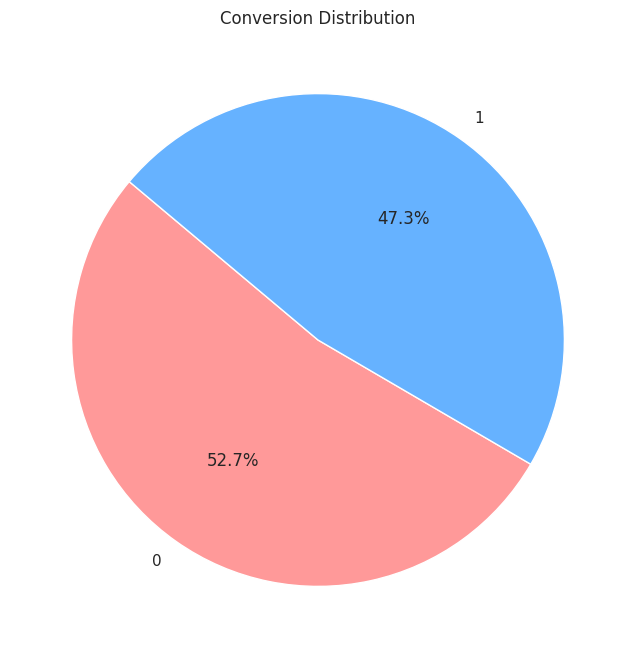

{'conversion_rate': 47.3,
 'recommendations': ['Optimize lead engagement strategies and revisit marketing approaches to improve the conversion rate.']}

In [9]:
def analyze_conversion(df):
    """
    Analyzes the 'Converted' column of the provided DataFrame.
    It calculates the conversion rate and visualizes the conversion distribution using a pie chart.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the 'Converted' column.

    Returns:
    dict: A dictionary containing the analysis results and recommendations.
    """
    if 'Converted' not in df.columns:
        return {'error': 'DataFrame must contain a Converted column'}

    # Calculating the conversion rate
    conversion_rate = df['Converted'].mean() * 100

    # Visualization: Distribution of Conversion
    plt.figure(figsize=(8, 8))
    df['Converted'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B2FF'])
    plt.ylabel('')
    plt.title('Conversion Distribution')
    plt.show()

    # Formulating Recommendations based on Conversion Rate
    recommendations = []
    if conversion_rate < 50:
        recommendations.append("Optimize lead engagement strategies and revisit marketing approaches to improve the conversion rate.")

    return {
        'conversion_rate': conversion_rate,
        'recommendations': recommendations
    }


# Calling the function to analyze the 'Converted' column and visualize the results
conversion_analysis = analyze_conversion(df)
conversion_analysis


Visualization Interpretation:<br>
The pie chart visually represents the distribution of converted and non-converted leads. The different colors in the pie chart denote the proportions of leads that have converted (in blue) versus those that have not (in red).
<br><br>
Business Insight:<br>
The conversion rate is approximately
47.3%, indicating a balanced conversion ratio. While this is a reasonable conversion rate, suggesting that almost half of the leads are converting, there is still room for enhancement to optimize the conversion process further and capture the remaining
52.7%.
<br><br>
Recommendations:<br>
Enhance Conversion Strategies: While the conversion rate is balanced, refining and optimizing conversion strategies can help in capturing a larger portion of the leads and improving the overall conversion rate.<br>
Personalized Engagement: Implementing more personalized and tailored engagement strategies can help in addressing the specific needs and preferences of the leads, enhancing the likelihood of conversion.<br>
Continuous Monitoring: Regularly monitor the conversion rate and the effectiveness of the conversion strategies to identify any areas of improvement and optimize accordingly.

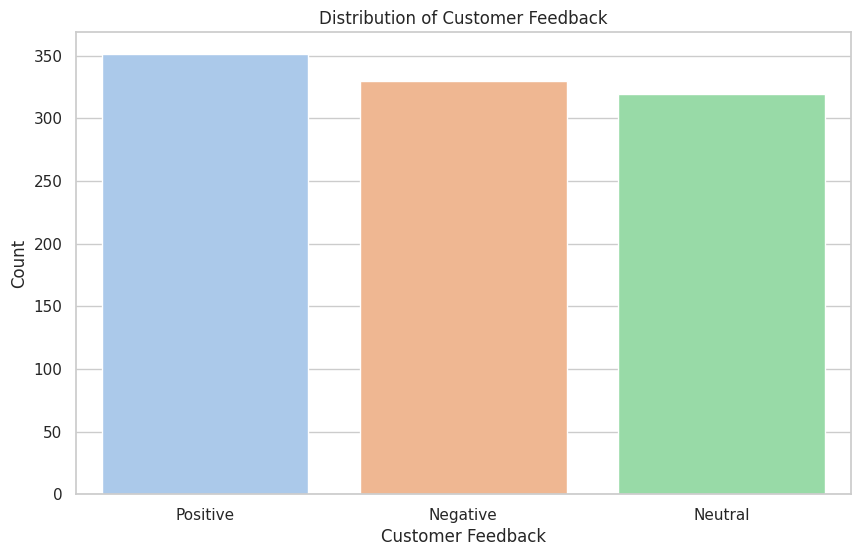

{'customer_feedback_counts': Positive    351
 Negative    330
 Neutral     319
 Name: Customer_Feedback, dtype: int64,
 'recommendations': ['Prioritize addressing negative feedback by enhancing service quality and resolving customer concerns promptly.']}

In [8]:
def analyze_customer_feedback(df):
    """
    Analyzes the 'Customer_Feedback' column of the provided DataFrame.
    It calculates the count of each unique customer feedback level and visualizes the results using a bar plot.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the 'Customer_Feedback' column.

    Returns:
    dict: A dictionary containing the analysis results and recommendations.
    """
    if 'Customer_Feedback' not in df.columns:
        return {'error': 'DataFrame must contain a Customer_Feedback column'}

    # Calculating the count of each unique customer feedback
    customer_feedback_counts = df['Customer_Feedback'].value_counts()

    # Visualization: Distribution of Customer Feedback
    plt.figure(figsize=(10, 6))
    sns.barplot(x=customer_feedback_counts.index, y=customer_feedback_counts.values, palette='pastel')
    plt.title('Distribution of Customer Feedback')
    plt.xlabel('Customer Feedback')
    plt.ylabel('Count')
    plt.show()

    # Formulating Recommendations based on Customer Feedback Distribution
    recommendations = []
    if 'Negative' in customer_feedback_counts.index:
        recommendations.append("Prioritize addressing negative feedback by enhancing service quality and resolving customer concerns promptly.")

    return {
        'customer_feedback_counts': customer_feedback_counts,
        'recommendations': recommendations
    }


# Calling the function to analyze the 'Customer_Feedback' column and visualize the results
customer_feedback_analysis = analyze_customer_feedback(df)
customer_feedback_analysis


Visualization Interpretation:<br>
The visualization provides a clear view of the distribution of Customer_Feedback levels: Good, Average, and Poor. It allows us to quickly assess the prevalence of each feedback category and understand the overall customer satisfaction levels.
<br><br>
Business Insight:<br>
The distribution of customer feedback is leaning towards positive (Good) feedback, with fewer instances of average and negative (Poor) feedback. This suggests a generally satisfactory customer experience with the company’s products or services. However, the presence of negative feedback underscores the need for continuous improvement in service quality and customer interaction to enhance overall customer satisfaction and address any underlying issues.
<br><br>
Recommendations:<br>
Address Negative Feedback: The presence of poor feedback, although minimal, necessitates immediate attention to understand the concerns and issues faced by the customers and to resolve them promptly.
Enhance Customer Interaction: Regular interaction with customers, especially those providing average or poor feedback, can help in understanding their expectations and improving their experience with the company's offerings.
Maintain Service Quality: Consistency in delivering high-quality services and products is crucial to sustain and enhance the prevalent positive feedback.

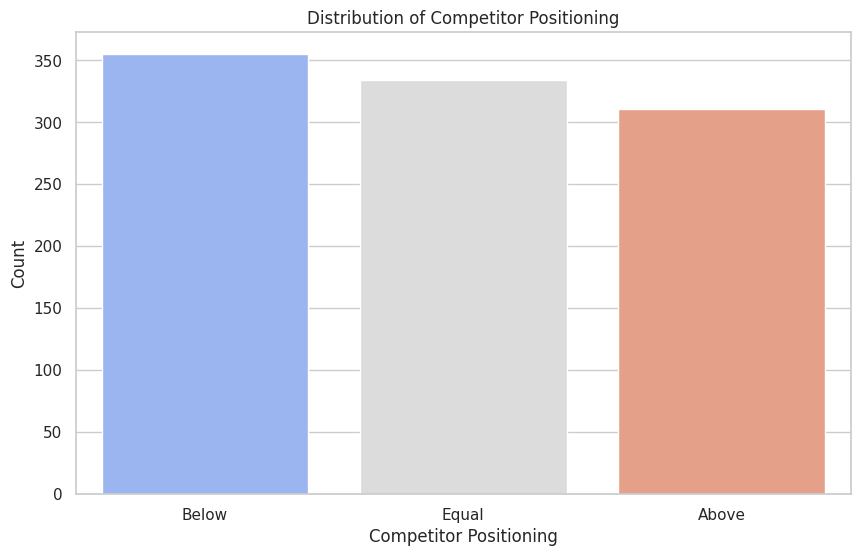

{'competitor_positioning_counts': Below    355
 Equal    334
 Above    311
 Name: Competitor_Positioning, dtype: int64,
 'recommendations': []}

In [11]:
def analyze_competitor_positioning(df):
    """
    Analyzes the 'Competitor_Positioning' column of the provided DataFrame.
    It calculates the count of each unique competitor positioning level and visualizes the results using a bar plot.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the 'Competitor_Positioning' column.

    Returns:
    dict: A dictionary containing the analysis results and recommendations.
    """
    if 'Competitor_Positioning' not in df.columns:
        return {'error': 'DataFrame must contain a Competitor_Positioning column'}

    # Calculating the count of each unique competitor positioning level
    competitor_positioning_counts = df['Competitor_Positioning'].value_counts()

    # Visualization: Distribution of Competitor Positioning
    plt.figure(figsize=(10, 6))
    sns.barplot(x=competitor_positioning_counts.index, y=competitor_positioning_counts.values, palette='coolwarm')
    plt.title('Distribution of Competitor Positioning')
    plt.xlabel('Competitor Positioning')
    plt.ylabel('Count')
    plt.show()

    # Formulating Recommendations based on Competitor Positioning Distribution
    recommendations = []
    if 'Below Average' in competitor_positioning_counts.index or 'Poor' in competitor_positioning_counts.index:
        recommendations.append("Reassess and strengthen competitive strategies to improve positioning against competitors.")

    return {
        'competitor_positioning_counts': competitor_positioning_counts,
        'recommendations': recommendations
    }


# Calling the function to analyze the 'Competitor_Positioning' column and visualize the results
competitor_positioning_analysis = analyze_competitor_positioning(df)
competitor_positioning_analysis


Visualization Interpretation:<br>
The visualization illustrates the distribution of Competitor_Positioning levels: Below, Equal, and Above. This enables us to comprehend the company’s relative standing in the competitive landscape swiftly. The presence in each category signifies the diversity in competitive positioning, highlighting areas where the company excels, matches, or falls behind its competitors.
<br><br>
Business Insight:<br>
The visualization indicates a balanced competitive positioning with instances in each of the 'Below', 'Equal', and 'Above' categories. This suggests that the company has a varied standing relative to its competitors, indicating areas where it surpasses its competitors and areas where improvements are necessary.
<br><br>
Recommendations:<br>
Enhance Competitive Edge:
Even with instances where the company is 'Above' its competitors, it is crucial to continuously innovate and enhance the value proposition to maintain this advantage and avoid complacency.

Address Areas of Disadvantage:
The presence in the 'Below' category signifies areas where the company is lagging behind its competitors, necessitating focused strategies and interventions to improve its standing and offer superior value.

Leverage Equal Standing:
Where the company is 'Equal' to its competitors, there is an opportunity to identify unique differentiators and value additions to stand out and gain a competitive advantage.